In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.5)
sns.set(color_codes=True)

%matplotlib inline

In [2]:
from ysi_utils.models import outlier_model, bagging_model, ensemble_predict
ensemble_predict.bagging_model = bagging_model()

/Users/pstjohn/anaconda3/envs/ysi/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator Imputer from version pre-0.18 when using version 0.19.dev0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/pstjohn/anaconda3/envs/ysi/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator VarianceThreshold from version pre-0.18 when using version 0.19.dev0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/pstjohn/anaconda3/envs/ysi/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version pre-0.18 when using version 0.19.dev0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/pstjohn/anaconda3/envs/ysi/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator PCA from version pre-0.18 when us

KeyboardInterrupt: 

In [5]:
from ysi_utils.data import low
from ysi_utils.descriptors import dragon
from ysi_utils.validation import y_train as y
from ysi_utils.validation import y_test

X = dragon.loc[y.index]
X_test = dragon.loc[y_test.index]

y_test_predictions = ensemble_predict(X_test)
y_train_predictions = ensemble_predict(X.values)
y['inlier'] = outlier_model.predict(X) == 1
y_test['inlier'] = outlier_model.predict(X_test) == 1

AttributeError: 'function' object has no attribute 'bagging_model'

In [6]:
from ysi_utils.tools import chemical_conversions

addl_molecules = [
    ['cyclopentanone',        '120-92-3', -11.66],
    ['2-methylbut-3-en-2-ol', '115-18-4',  -6.78],
    ['2,5-dimethylfuran',     '625-86-5',  35.37],
    ['2-phenylethanol',        '60-12-8', 272.45],
    ['4-methylanisole',       '104-93-8', 141.27],
    ['2,4-xylenol',           '105-67-9', 175.02]]

molecule_df = pd.DataFrame(addl_molecules, columns=['Name', 'CAS', 'YSI'])
molecule_df['SMILES'] = molecule_df.CAS\
    .apply(chemical_conversions.get_smiles_from_cas, db='nist')\
    .apply(chemical_conversions.canonicalize_smiles)
molecule_df
#y_exp_pred = ensemble_predict(dragon.loc[molecule_df.SMILES])
#molecule_df

,Name,CAS,YSI,SMILES
0,cyclopentanone,120-92-3,-11.66,O=C1CCCC1
1,2-methylbut-3-en-2-ol,115-18-4,-6.78,C=CC(C)(C)O
2,"2,5-dimethylfuran",625-86-5,35.37,Cc1ccc(C)o1
3,2-phenylethanol,60-12-8,272.45,OCCc1ccccc1
4,4-methylanisole,104-93-8,141.27,COc1ccc(C)cc1
5,"2,4-xylenol",105-67-9,175.02,Cc1ccc(O)c(C)c1


In [7]:
high = pd.read_pickle('high.p')

In [8]:
new_smiles = list(set(high.SMILES).union(molecule_df.SMILES))
with open('new_mols.smi', 'w') as f:
    f.write('\n'.join(new_smiles))

In [9]:
len(new_smiles)

147

In [10]:
high['YSIl'] = (high.YSI - 16.9) / 0.1331

In [11]:
from ysi_utils.tools import descriptors

In [12]:
low_elem = low.join(low.SMILES.apply(descriptors.get_element_dict))
high_elem = high.join(high.SMILES.apply(descriptors.get_element_dict))

low_elem['O'].fillna(0, inplace=True)
high_elem['O'].fillna(0, inplace=True)

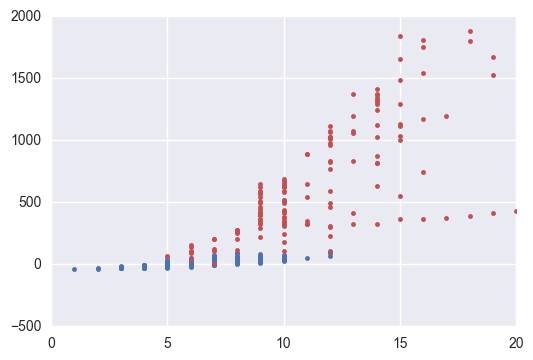

In [13]:
plt.plot(low_elem.C, low_elem.YSI, '.')
plt.plot(high_elem.C, high_elem.YSIl, 'r.')

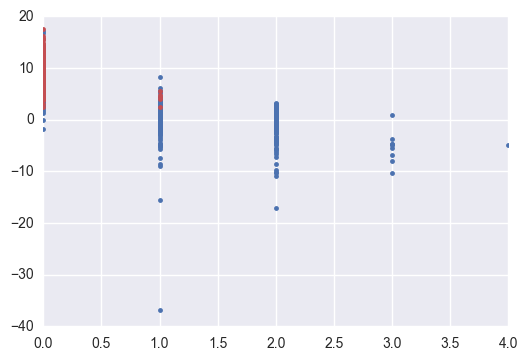

In [14]:
plt.plot(low_elem.O, low_elem.YSI / low_elem.C, '.')
plt.plot(high_elem.O, high_elem.YSI / high_elem.C, 'r.')

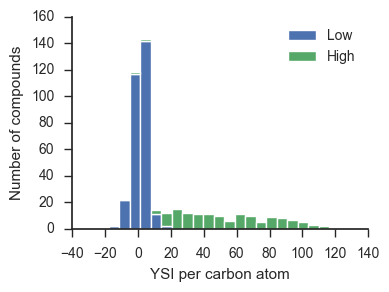

In [32]:
with sns.axes_style('ticks'):
    
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    
    ax.hist([low_elem.YSI / low_elem.C, high_elem.YSIl / high_elem.C],
             stacked=True, bins=25, rwidth=1., edgecolor='w', linewidth=1., label=['Low', 'High'], normed=False)
    
    #ax.set_xlim([-20, 20])
    ax.legend(loc='upper right')
    sns.despine()
    
    ax.set_xlabel('YSI per carbon atom')
    ax.set_ylabel('Number of compounds')
    
    fig.tight_layout()
    fig.savefig('ysi_per_carbon.svg', transparent=True)

In [25]:
high_elem

,Species,CAS,Ref,YSI,SMILES,YSIl,Br,C,Cl,F,H,N,O
0,cyclopentene,142-29-0,1,26.2,C1=CCCC1,69.872276,NaN,5.0,NaN,NaN,8.0,NaN,0.0
1,benzene,71-43-2,1,30.0,c1ccccc1,98.422239,NaN,6.0,NaN,NaN,6.0,NaN,0.0
2,"1,3-cyclohexadiene",592-57-4,1,29.7,C1=CCCC=C1,96.168295,NaN,6.0,NaN,NaN,8.0,NaN,0.0
3,"1,4-cyclohexadiene",628-41-1,1,30.2,C1=CCC=CC1,99.924869,NaN,6.0,NaN,NaN,8.0,NaN,0.0
4,cyclohexene,110-83-8,1,22.7,C1=CCCCC1,43.576258,NaN,6.0,NaN,NaN,10.0,NaN,0.0
5,1-methyl-1-cyclopentene,693-89-0,1,29.5,CC1=CCCC1,94.665665,NaN,6.0,NaN,NaN,10.0,NaN,0.0
6,fluorobenzene,462-06-6,1,31.2,Fc1ccccc1,107.438017,NaN,6.0,NaN,1.0,5.0,NaN,0.0
7,chlorobenzene,108-90-7,1,35.3,Clc1ccccc1,138.241923,NaN,6.0,1.0,NaN,5.0,NaN,0.0
8,bromobenzene,108-86-1,1,37.1,Brc1ccccc1,151.765590,1.0,6.0,NaN,NaN,5.0,NaN,0.0
9,toluene,108-88-3,1,43.5,Cc1ccccc1,199.849737,NaN,7.0,NaN,NaN,8.0,NaN,0.0
